# 机器学习
* 机器学习（Machine Learning）是人工智能的分支，其目标是通过算法从现有的数据中建立模型（学习）来解决问题。
* 机器学习是一门交叉学科，涉及概率统计（probability and statistics），优化（optimization），和计算机编程（computer programming）等等。
* 用途极为广泛：从预测信用卡违约风险，癌症病人五年生存概率到汽车无人驾驶，都有着机器学习的身影。
* 备受重视：人们在决策分析的时候越来越多得用定量方法（quantitative approach）来衡量一个决策的优劣。

# 机器学习的主要任务
## 监督学习
* 监督学习（Supervised Learning）：从给定的训练数据集中学习出一个函数，当新的数据到来时，可以根据这个函数预测结果。监督学习的训练集（training data）要求是包括输入和输出，也可以说是特征和目标。
* 监督学习中又可进一步分为两大类主要问题：预测与分类。房价预测是一个典型的预测问题，房价作为目标是一个连续型变量。信用卡违约预测是一个典型的分类问题，是否违约作为一个目标是一个分类变量。
 
## 无监督学习
* 无监督学习（Unsupervised Learning）：训练集没有人为标注的结果。我们从输入数据本身探索规律。
* 无监督学习的例子包括图片聚类分析，文章主题分类，基因序列分析，和高纬数据（high dimensional data) 降维等等。

## 案例分析：波士顿地区房价
* 房价分析与预测是典型的监督学习中的预测问题。我们将使用boston房价为例子来引入监督学习的概念。
* 数据来源： Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
* 我们使用这个案例来展示在python中使用机器学习的一般流程，让大家对机器学习有一个直观感受。撇开艰涩的理论，在应用层面对有python基础的人来说，使用机器学习是水到渠成的。

### 数据描述
* 目标：自住房的中间价，以1000美元计价。
* 特征：13个特征，包括犯罪率，每个镇（town）非商用面积百分比，平均每个房子的房间数，房产税率，黑人比例，里波士顿工作中心的加权距离，等等。

* CRIM: per capita crime rate by town 犯罪率
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 后院面积大于25000平方英尺的比例
* INDUS: proportion of non-retail business acres per town 
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 是否靠近查尔斯河
* NOX: nitric oxides concentration (parts per 10 million) nitric oxides浓度
* RM: average number of rooms per dwelling 每间住宅的平均房间数
* AGE: proportion of owner-occupied units built prior to 1940 1940年前建造的自住房房屋比例
* DIS: weighted distances to five Boston employment centres 离波士顿五个工作中心的加权距离
* RAD: index of accessibility to radial highways 高速公路可得性指数
* TAX: full-value property-tax rate per \$1000 每1000美元地税
* PTRATIO: pupil-teacher ratio by town 学生教师比
* B: $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town 
* LSTAT: \% lower status of the population 下层经济阶层百分比
* MEDV: Median value of owner-occupied homes in $1000's 自住房中间价格

In [53]:
# sklearn是机器学习模型的主要工具
import matplotlib.pyplot as plt #作图
from sklearn import datasets #数据
from sklearn.feature_selection import SelectKBest, f_regression #特征选取
from sklearn.linear_model import LinearRegression #线性回归
from sklearn import metrics #线性回归
import numpy as np
import pandas as pd
%matplotlib inline 
 #!/usr/bin/env python -W ignore::DeprecationWarning


## 首选，我们读取数据。
### 房价预测是典型的监督学习，所以我们的训练集（training data）要求特征和目标。

In [26]:
#读取波士顿房价数据
boston_dataset = datasets.load_boston()
X_full = boston_dataset.data #导入特征
Y = boston_dataset.target #导入目标： 房屋中间价 1000美元计价。
# X_full是一个ndarray
print X_full.shape #shape method读取数据尺寸，我们有506个数据点和13个变量
print Y.shape #目标一般都是一维变量。Y是一个ndarray。

(506, 13)
(506,)


In [3]:
# feature_names列举了所有特征名字，上方有其对应的描述
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [14]:
# 把数据分为训练集合测试集
# 为了测试模型的表现，我们将数据分为70%的训练集和30%的测试集
# 使用train_test_split函数可以帮助我们随机选取训练集和测试集
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y, test_size=0.3, random_state=0) 

In [55]:
# 让我们从最简单的形式开始，我们从这13个特征里只选择一个建立一个线性模型。
# 我们选择最后一个特征LSTAT （下层经济阶层百分比）
# 使用reshape将X转为为二维数组
X = X_train[:, 12].reshape((-1,1)) #X：LSTAT 

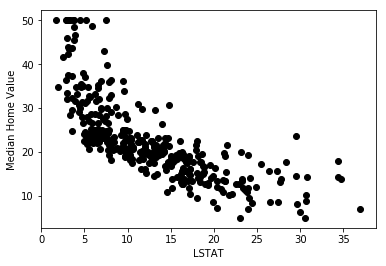

In [24]:
# 数据可视化
plt.scatter(X, Y_train, color='black')
plt.ylabel('Median Home Value')
plt.xlabel('LSTAT')
plt.show() #看到什么规律了吗？

## 商业观察：随着低收入阶层的减少, 房价攀升，这与我们的预期相符。
###  定量建模第一步：简单线性模型 （simple linear regression）。 $y=\beta_0+\beta_1 x+\epsilon$ 
### 我们将使用著名的最小二乘法来拟合一条直线，我们暂时可以将拟合的过程视为一个黑盒子

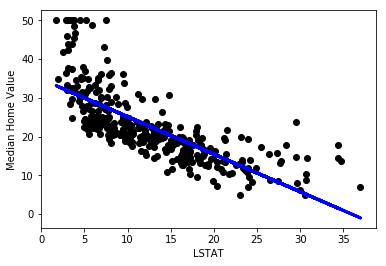

In [48]:
regressor = LinearRegression(normalize=True) #使用sklearn里线性回归的模块
regressor.fit(X, Y_train)
plt.scatter(X, Y_train, color='black')
plt.plot(X, regressor.predict(X), color='blue', linewidth=3)
plt.ylabel('Median Home Value')
plt.xlabel('LSTAT')
plt.show()  # 使用抛物线拟合会不会更好？

In [49]:
# 我们可以查看beta1的估计值
# 我们可以这样理解beta1：当下层经济百分比增加1%，房屋平均中间价位降低$970
print('Coefficients: \n', regressor.coef_) #beta_1的点估计值

('Coefficients: \n', array([-0.96814078]))


In [54]:
# 使用RMSE来检查预测误差，RMSE越大误差则越大。
X_1d_test = X_test[:, 12].reshape(-1, 1)
metrics.mean_squared_error(Y_test, regressor.predict(X_1d_test))

39.817150504744163

# 后续问题：
* 如何解决非线性问题？
* 如何预测房价给定某个LSTAT？
* 仅仅使用一个特征是不是足够？如何将其他特征放入模型中？
* 如果要使用多个特征，我们应该如何选取？我们在后续课程中会介绍著名的lasso来帮助线性模型选取特征。
* 如何评判一个模型的好坏？在面对未知的数据是，如何评估一个模型预的测能力？

# 使用经典lasso方法进行模型选取
## lasso的核心思想是加入$L_1$ panalty以达到参数稀疏性的目的，我们暂时可以理解为一个可以帮助我们选择有用特征的黑盒子方法。

In [57]:
from sklearn import cross_validation
from sklearn.linear_model import Lasso, LassoCV

In [66]:
# alpha是lasso需要的调谐参数（tuning parameters）。
alphas = 10**np.linspace(10,-2,100)*0.5
alphas.shape

(100,)

### 画出参数在不同alpha取值的估计值，当alpha变大时候大部分的参数都为零，从而起到了特征选取的目的 （并不是所有变量都是有用的，一些变量是噪音）。最优的alpha取值由训练集上的交叉检验（cross-validation）来决定。
* 核心思想是使用不同的alpha拟合模型，alpha越大系数估计值的绝对值趋小，最终alpha足够大时，所有的系数估计值都为0
* 我们的目标是选取一个合适的alpha，一部分特征值得系数估计值为0，而且模型有着好的预测能力。这样就起到了特征选择的目的。
* 不必完全理解里面的所有含义，我们使用这个案例来展示python代码的简洁易用性

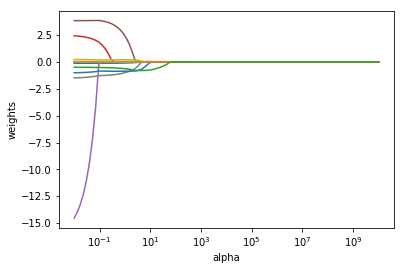

In [65]:
lasso = Lasso(max_iter=10000, normalize=False)
coefs = []
# 使用不同的alpha训练一个lasso回归
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
# gca是Get Current Axes的缩写，指的是获得当前图表
ax = plt.gca()
# coefs是一个列表，每个元素是13个特征在不同alpha下的估计值
ax.plot(alphas*2, coefs)
# 使用log为x坐标轴的计数法
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
# 不同颜色的线代表不同变量，总共有13根线代表13个变量
plt.show()

### 现在我们的问题是在那么多alpha中应该选取哪一个？
* sklearn的lasso模块提供了使用交叉检验(cross-validation)功能帮助我们选取最优alpha

In [70]:
# 利用cross-validation选取最优alpha，这里使用的标准是RMSE（Root Mean Squared Error）。
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=False)
lassocv.fit(X_train, Y_train)
# lassoCV帮助我们选取了最优的alpha值为0.755
lassocv.alpha_

0.75489236729547671

In [71]:
# 将最优alpha代入lasso模型中即可！
lasso.set_params(alpha=lassocv.alpha_)
# 设定alpha之后，使用X_train和Y_train拟合模型
lasso.fit(X_train, Y_train)
# 放入多变量之后MRSE显著减小！
metrics.mean_squared_error(Y_test, lasso.predict(X_test))

30.866801508889896

In [72]:
#查看lasso参数估计，注意到有三个变量系数的估计值为0==》特征选取。
import pandas as pd
print(pd.Series(lasso.coef_, index=boston_dataset.feature_names))

CRIM      -0.078710
ZN         0.048115
INDUS     -0.000000
CHAS       0.000000
NOX       -0.000000
RM         1.652658
AGE        0.002939
DIS       -0.874493
RAD        0.206365
TAX       -0.014080
PTRATIO   -0.852610
B          0.007214
LSTAT     -0.677797
dtype: float64


# 通过以上分析我们可以获得以下商业洞察
 * 房价随着犯罪率的下降尔上升。
* 房价随着离波士顿五个就业中心的距离增加而下降。
* 房价随着税收比例的增加而下降。
* 房价随着下层经济人口百分比的增加而下降，
* 房价随着学生教师比的增加而下降，这点似乎出乎意料，可以进一步探究。
* 房价与是否靠近查尔斯河无关。
* 房价与一氧化氮浓度无关。

# 我们还可以使用这个拟合好的模型对其他地区房价进行预测，以帮助合作伙伴决定新建房的位置面积等等。

## 在实践当中
* 数据的获取往往是很费周折的一个步骤，从确定所需要的数据到采集清理，这个过程可以长达数个月甚至一年。
* 确定一个有意义的问题是成功的一般，现实问题中我们往往要将商业需要的问题转化为一个数据能回答的问题。
* 和模型无关的步骤往往要占据整个过程90%以上的时间，正如我们刚看到的，使用python做机器学习是非常简洁的！